# Using the Twitter API

In [1]:
import pickle
import os
import twitter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

Check for credentials saved locally in a pickle file, if not found create one by inputting credentials

In [2]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

Authorize the application to access Twitter account information

In [3]:
auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

Twitter utilizes the where on earth ID (WOEID) to geographically tag tweets. WOEID lookup found [here](http://www.woeidlookup.com/).

In [187]:
#Use ID to limit scope of queries
US_ID = 23424977
#See what is trending in the US
us_trends = twitter_api.trends.place(_id=US_ID)
trends_set = set([trend['name'] for trend in us_trends[0]['trends']])
trends_set

{'#ANABrand',
 '#ATM18',
 '#AdobeSummit',
 '#AltonSterling',
 '#BookBirthday',
 '#DiabetesAlertDay',
 '#FairTaxNow',
 '#GTC18',
 '#HITMC',
 '#HowToEvangelical',
 '#IWantADiscountFor',
 '#JWST',
 '#KingJacksonDay',
 '#LIFTed18',
 '#MDMC18',
 '#MuslimWomensDay',
 '#MyMugshotIncludes',
 '#NationalJoeDay',
 '#PutPatientsFirst',
 '#RenewalAwards',
 '#SMTLive',
 '#TravelTuesday',
 '#TuesdayThoughts',
 '#WANTYOUBACKVIDEO',
 '#WeHaveRights',
 '#WorldTheatreDay',
 '#hiddenrules',
 '#scc18',
 'Bam Adebayo',
 'Brad Boxberger',
 'Brandon Weeden',
 'Census',
 'Christian Kirk',
 'Chromebooks',
 'Dottie West',
 'GM Dave Gettleman',
 'Jeff Capel',
 'John Isner',
 'LiAngelo Ball',
 'Michael Davidson',
 'Mitt Romney',
 'Repeal the Second Amendment',
 'Shyp',
 'State of the State',
 'Strampel',
 'Superior',
 'Tranh Cong Phan',
 'Trevone Boykin',
 'Walls',
 'iPad'}

Pick a random trend and look at them.
Documentation for search API found [here](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets).

In [116]:
#Pick random trend
queries = list(np.random.choice(list(trends_set), 1, replace = False))
#Pick number of queries to return
number = 100
search_results = twitter_api.search.tweets(q=queries, count=number)
statuses = search_results['statuses']
#Print a list of keys found within results
print('Random trend: \n' + str(queries))
print('Response keys using search API: \n' + str(list(statuses[0].keys())))

Random trend: 
['Johnny Gimble']
Response keys using search API: 
['in_reply_to_screen_name', 'retweeted_status', 'id_str', 'lang', 'is_quote_status', 'id', 'place', 'in_reply_to_user_id', 'truncated', 'in_reply_to_status_id', 'retweeted', 'favorited', 'geo', 'in_reply_to_status_id_str', 'user', 'created_at', 'metadata', 'contributors', 'in_reply_to_user_id_str', 'entities', 'favorite_count', 'retweet_count', 'source', 'coordinates', 'text']


Retrive the status text and hashtags of each tweet

In [117]:
status_texts = [status['text'] for status in statuses]

hashtags = [hashtag['text'] for status in statuses
                 for hashtag in status['entities']['hashtags']]

#Split each word in status text into a list
words = [w for t in status_texts 
              for w in t.split()]

Create a formatted table that shows frequency of words and hashtags

In [118]:
def prettyprint_counts(label, list_of_tuples):
    print("\n{:^20} | {:^6}".format(label, "Count"))
    print("*"*40)
    for k,v in list_of_tuples:
        print("{:20} | {:>6}".format(k,v))
        
for label, data in (('Word', words), 
                    ('Hashtag', hashtags)):  
    c = Counter(data)
    prettyprint_counts(label, c.most_common()[:10])


        Word         | Count 
****************************************
of                   |    122
Johnny               |     81
the                  |     72
and                  |     65
RT                   |     60
Country              |     55
Hall                 |     52
Music                |     50
to                   |     49
Gimble,              |     47

      Hashtag        | Count 
****************************************
OpryMember           |     10
HonorThyMusic        |      6
Spotify              |      2
DottieWest           |      2
Music                |      1
CMA                  |      1
JohnnyGimble         |      1
RickySkaggs          |      1
Johnny               |      1


Remove stopwords, @'s and RT's to get a better idea of what is being tweeted

In [142]:
stopwords = set(STOPWORDS)
filtered_words = [word for word in words if word.lower() not in stopwords
                 and not word.startswith('@')
                 and word != 'RT'
                 and word.lower() != 'https']
for label, data in (('Word', filtered_words), 
                    ('Hashtag', hashtags)):  
    c = Counter(data)
    prettyprint_counts(label, c.most_common()[:10])


        Word         | Count 
****************************************
Johnny               |     81
Country              |     55
Hall                 |     52
Music                |     50
Gimble,              |     47
2018                 |     43
Dottie               |     42
class                |     41
Congratulations      |     35
inductees            |     33

      Hashtag        | Count 
****************************************
OpryMember           |     10
HonorThyMusic        |      6
Spotify              |      2
DottieWest           |      2
Music                |      1
CMA                  |      1
JohnnyGimble         |      1
RickySkaggs          |      1
Johnny               |      1


Create a wordcloud to visualize the frequency distribution using a custom mask of the Twitter logo

In [175]:
mask = misc.imread('C:/Users/Josh/Desktop/Python for Data Science/WordCloud/twitter_mask.png')
wc = WordCloud(font_path = 'C:/Windows/Fonts/arial.ttf', width=1800, height=1400,
               max_words=int(len(filtered_words)/4), mask=mask, background_color='black').generate(' '.join(filtered_words))

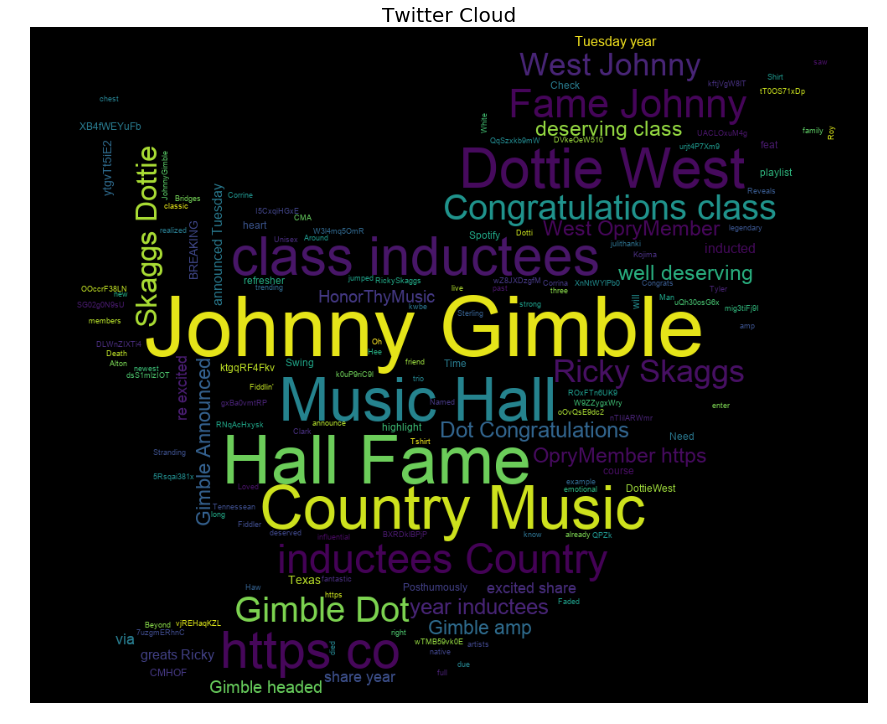

In [186]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title("Twitter Cloud", fontsize=20)
plt.imshow(wc)
plt.axis("off")
plt.show()